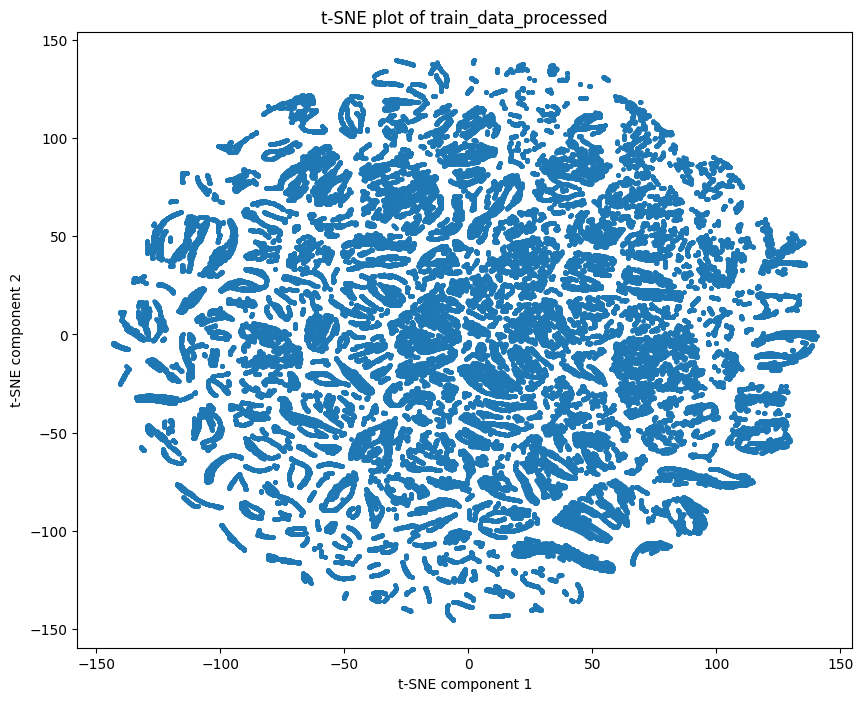

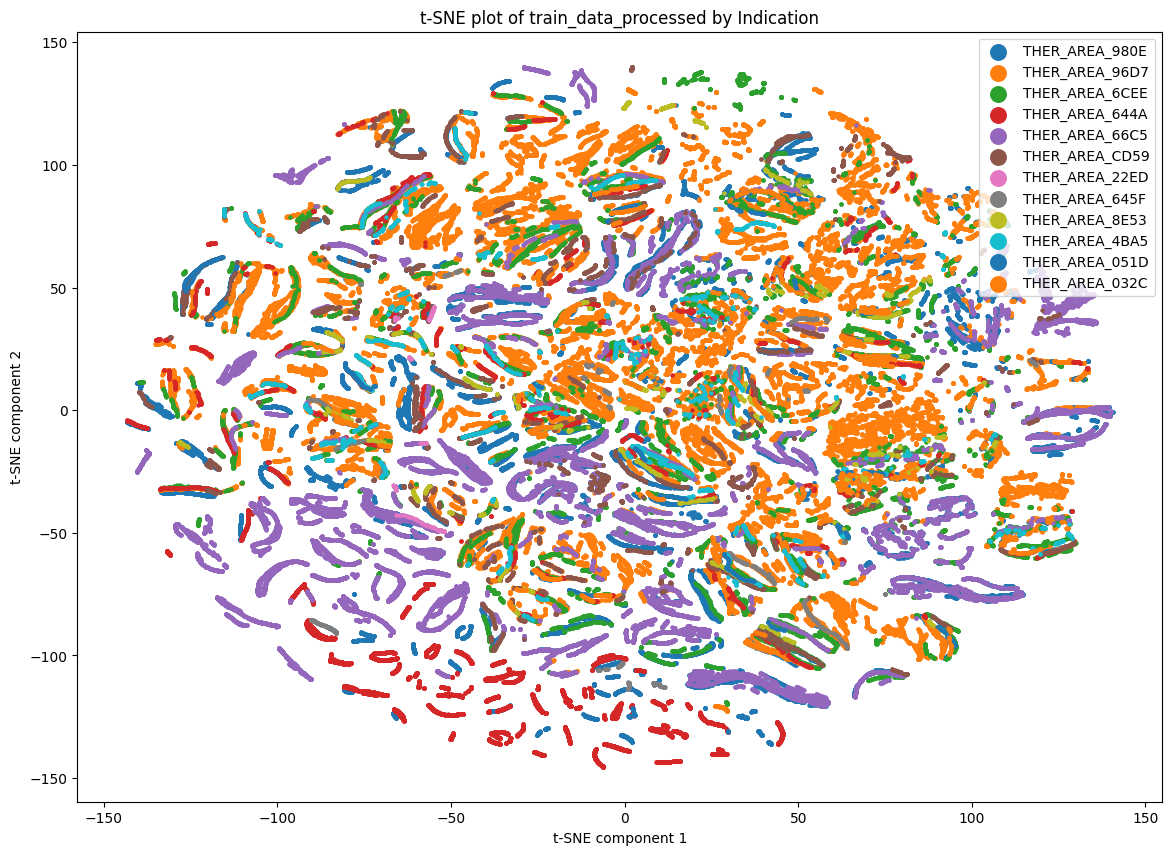

In [9]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Assuming the data needs to be scaled before applying t-SNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Plot the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=5)
plt.title('t-SNE plot of train_data_processed')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

# Add indication information to the t-SNE result
data_tsne_df = pd.DataFrame(data_tsne, columns=['tsne_component_1', 'tsne_component_2'])
data_tsne_df['therapeutic_area'] = data['therapeutic_area'].values

# Plot the t-SNE result colored by indication
plt.figure(figsize=(14, 10))
for indication in data_tsne_df['therapeutic_area'].unique():
    subset = data_tsne_df[data_tsne_df['therapeutic_area'] == indication]
    plt.scatter(subset['tsne_component_1'], subset['tsne_component_2'], label=indication, s=5)

plt.title('t-SNE plot of train_data_processed by Indication')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend(loc='best', markerscale=5)
plt.show()

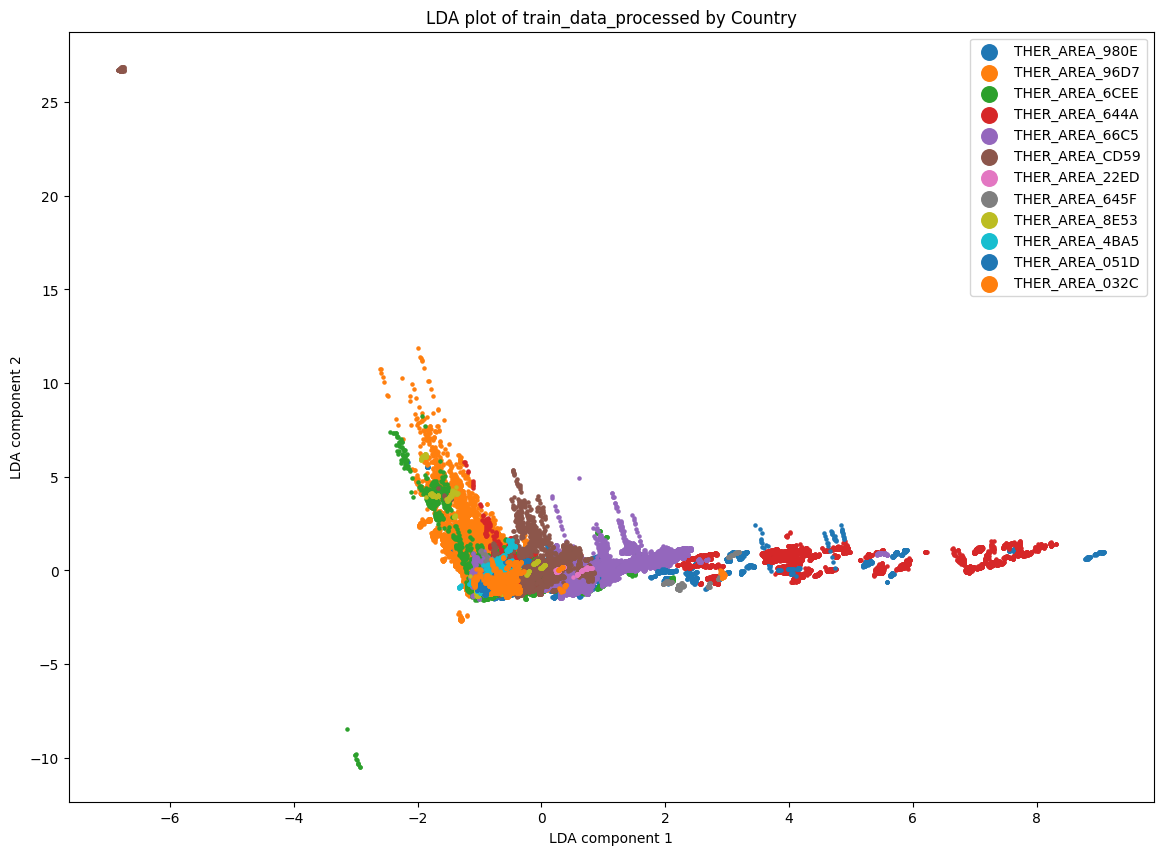

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Select the numerical columns and the target variable
X = numerical_data
y = data['therapeutic_area']

# Initialize the LDA model
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit and transform the data
data_lda = lda.fit_transform(X, y)

# Create a DataFrame for the LDA result
data_lda_df = pd.DataFrame(data_lda, columns=['lda_component_1', 'lda_component_2'])
data_lda_df['therapeutic_area'] = y.values

# Plot the LDA result
plt.figure(figsize=(14, 10))
for country in data_lda_df['therapeutic_area'].unique():
    subset = data_lda_df[data_lda_df['therapeutic_area'] == country]
    plt.scatter(subset['lda_component_1'], subset['lda_component_2'], label=country, s=5)

plt.title('LDA plot of train_data_processed by Country')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.legend(loc='best', markerscale=5)
plt.show()

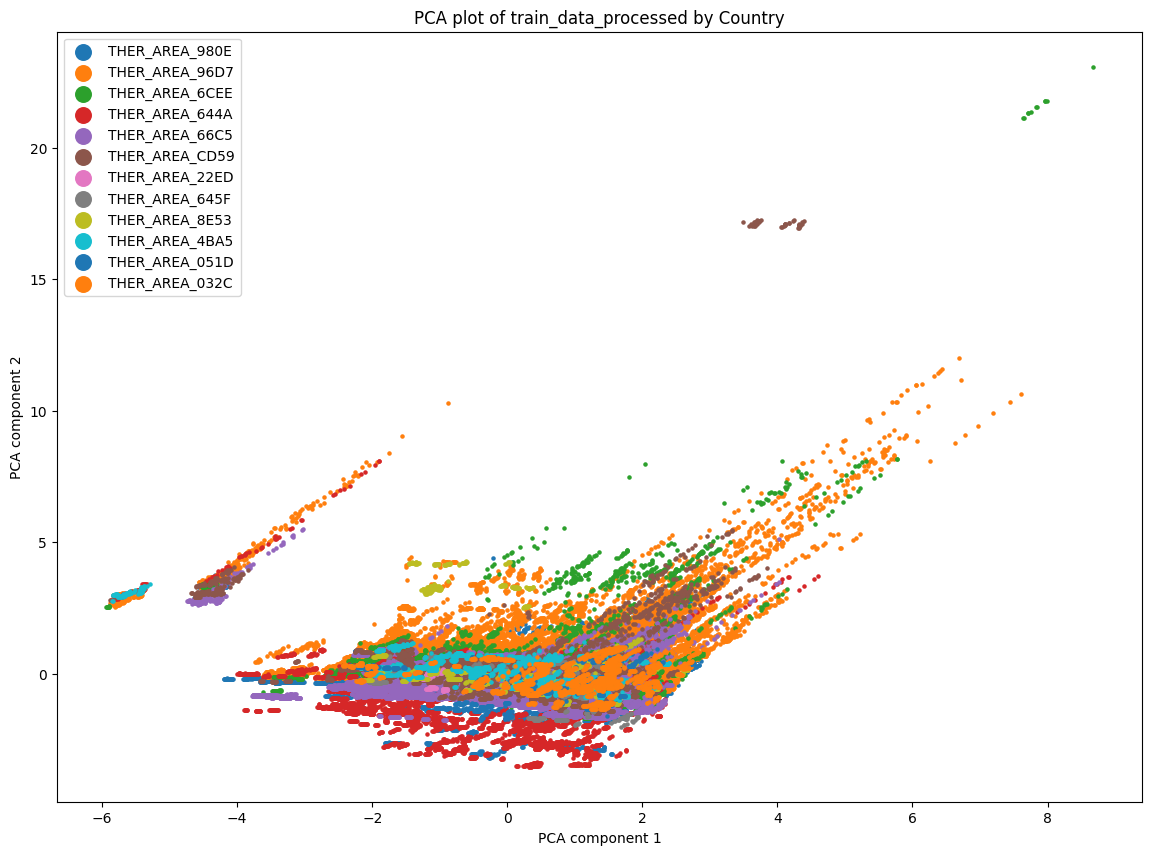

In [12]:
from sklearn.decomposition import PCA

# Initialize the PCA model
pca = PCA(n_components=2)

# Fit and transform the data
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA result
data_pca_df = pd.DataFrame(data_pca, columns=['pca_component_1', 'pca_component_2'])
data_pca_df['therapeutic_area'] = data['therapeutic_area'].values

# Plot the PCA result
plt.figure(figsize=(14, 10))
for country in data_pca_df['therapeutic_area'].unique():
    subset = data_pca_df[data_pca_df['therapeutic_area'] == country]
    plt.scatter(subset['pca_component_1'], subset['pca_component_2'], label=country, s=5)

plt.title('PCA plot of train_data_processed by Country')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.legend(loc='best', markerscale=5)
plt.show()

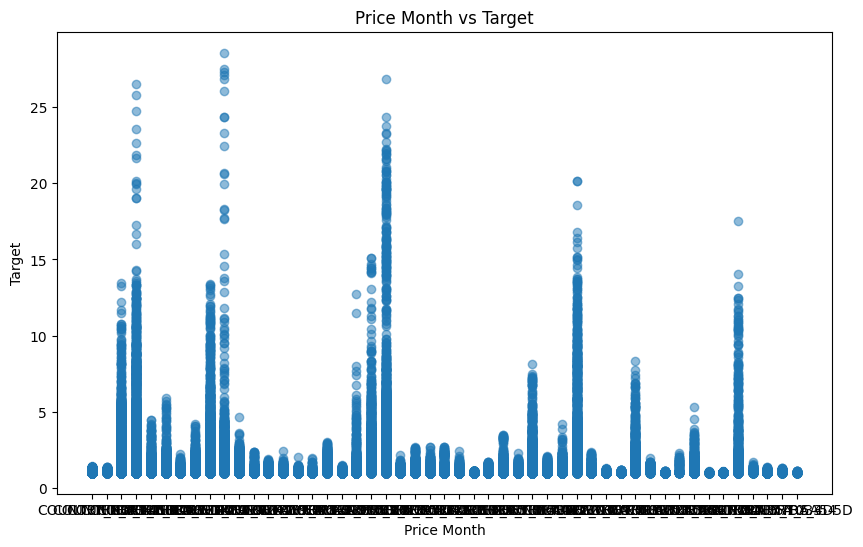

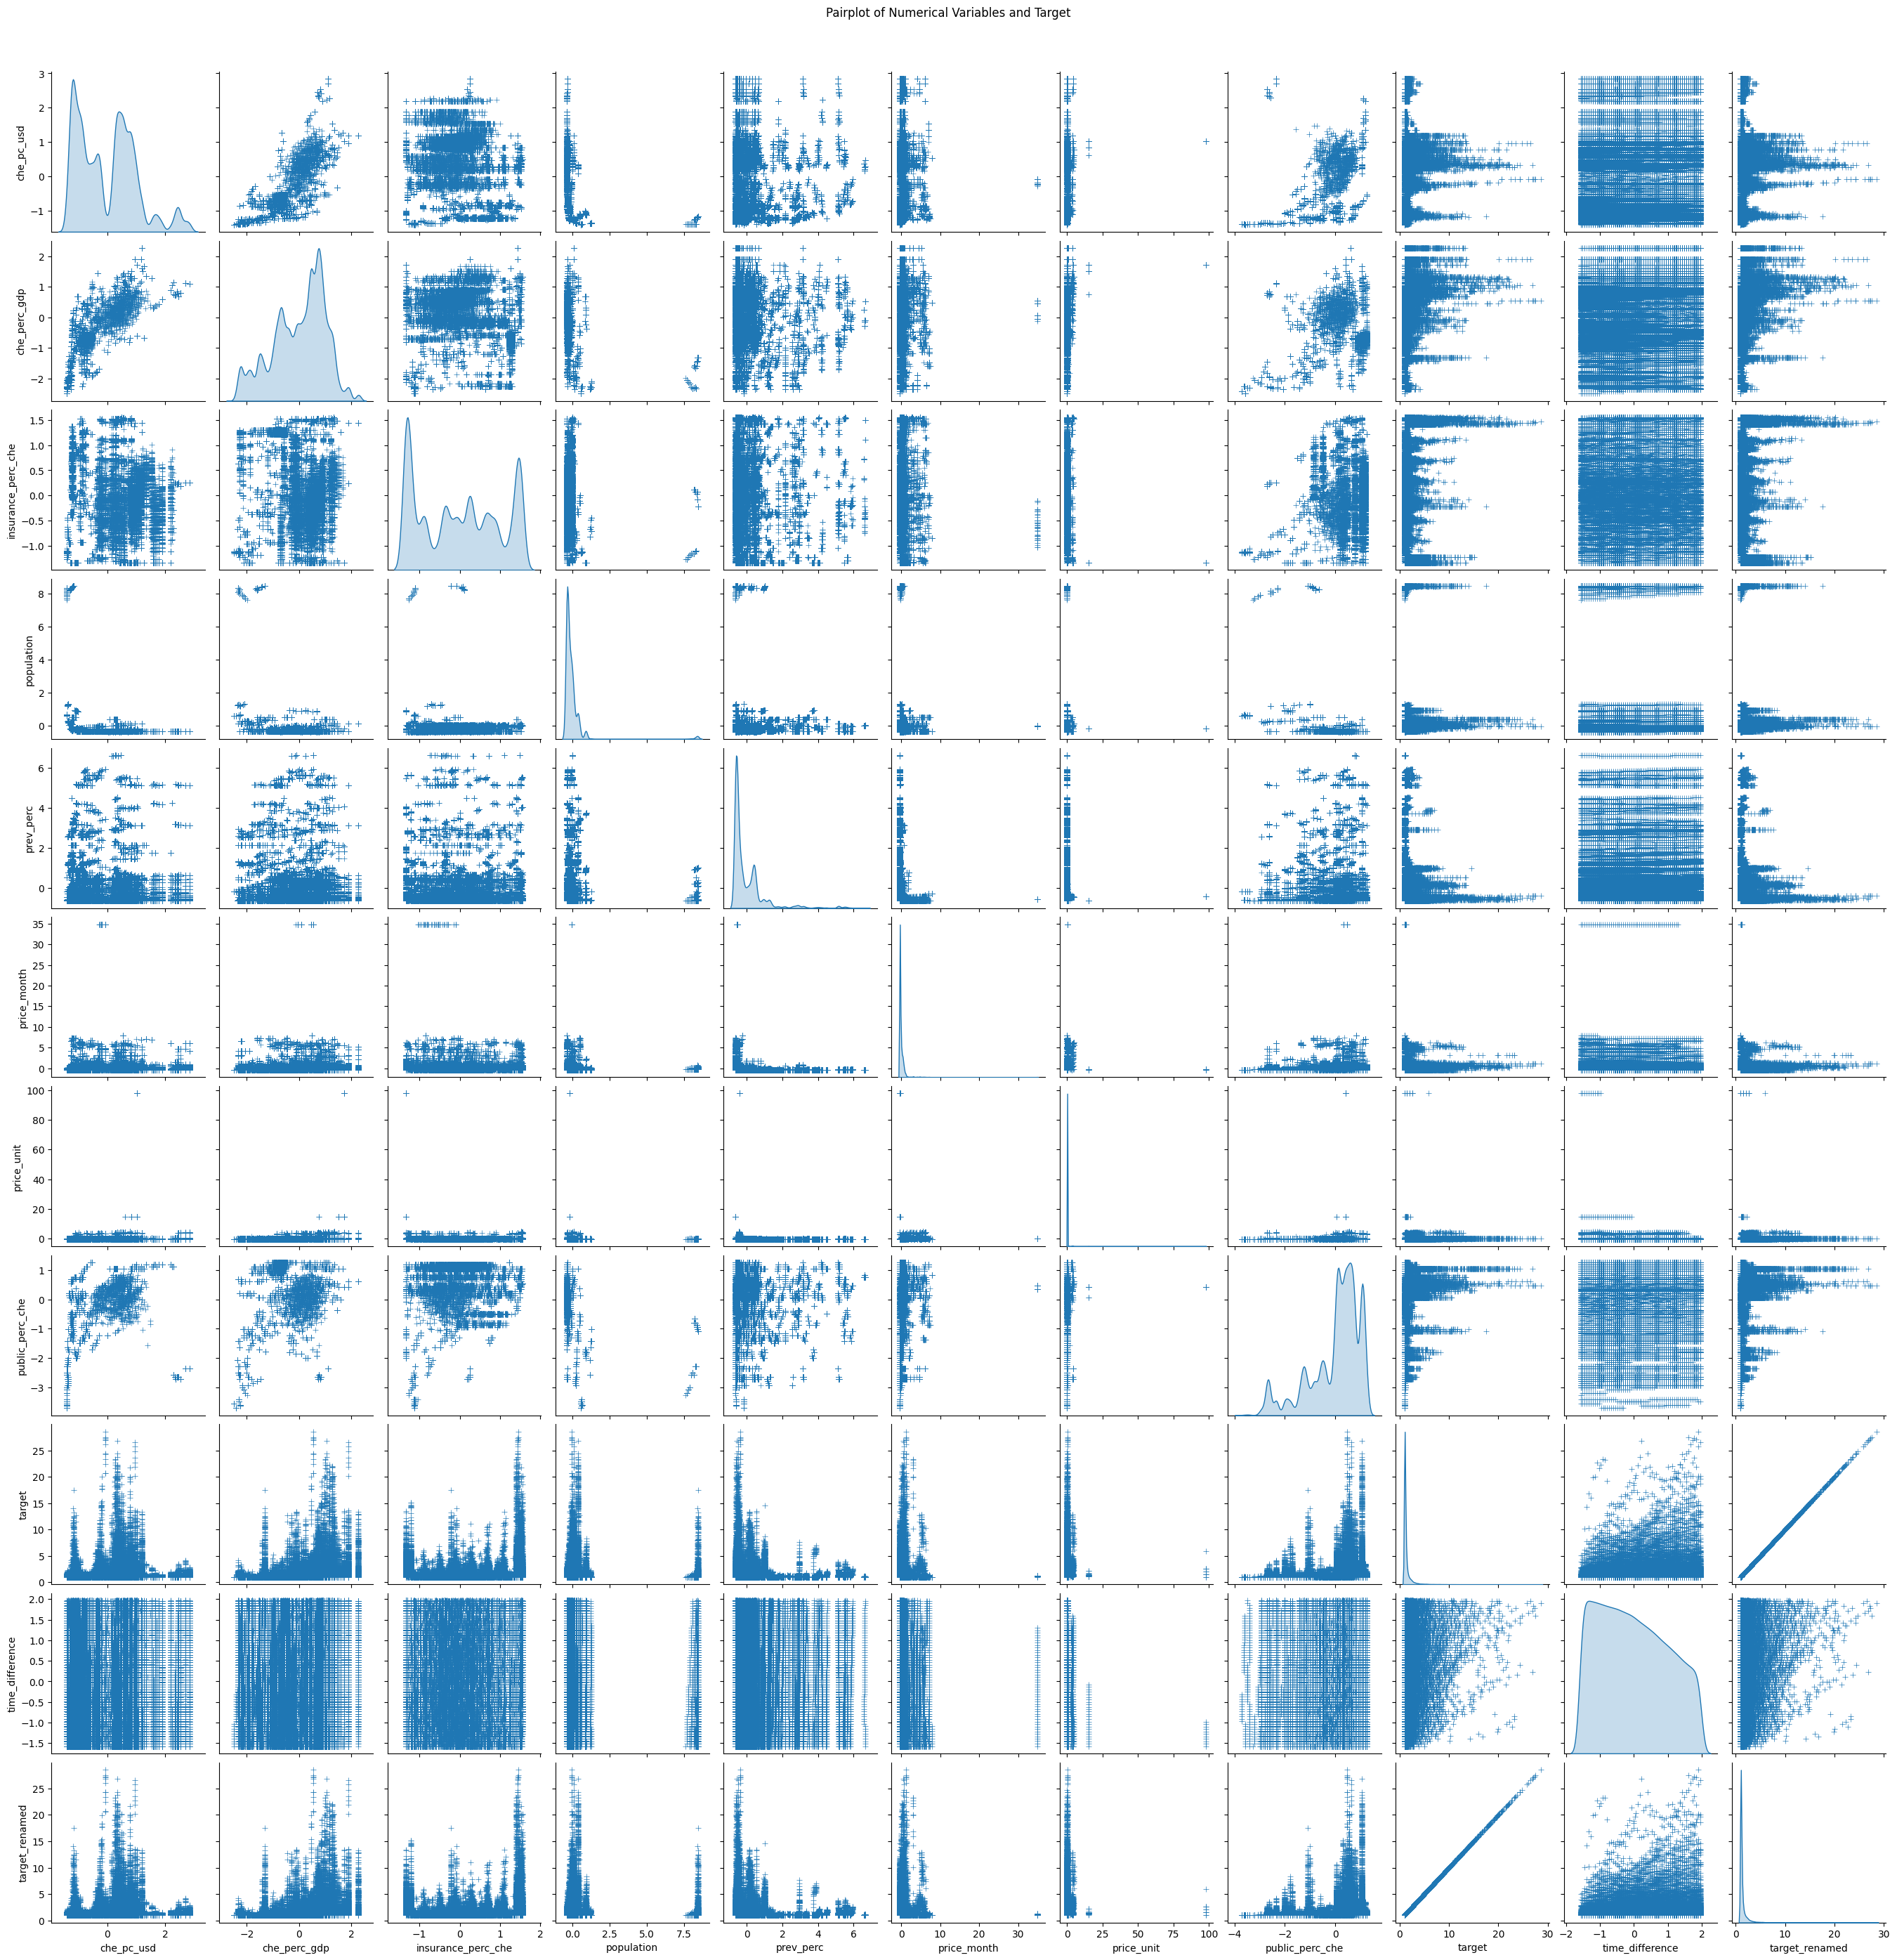

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(data['country'], data['target'], alpha=0.5)
plt.title('Price Month vs Target')
plt.xlabel('Price Month')
plt.ylabel('Target')
plt.show()
# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot pairplot between all numerical variables and the target
# Rename the target column to avoid overlap
data_renamed = data.rename(columns={'target': 'target_renamed'})

# Plot pairplot between all numerical variables and the renamed target
sns.pairplot(data.join(data_renamed['target_renamed']), diag_kind='kde', markers='+')
plt.suptitle('Pairplot of Numerical Variables and Target', y=1.02)
plt.show()